<a href="https://colab.research.google.com/github/khushidubeyokok/PyTorch/blob/main/nnclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network classification with pytorch

A classification problem involves predicting whether something is one thing or another.
 types : Binary classification, Multi-class classification , Multi-label classification

## Building a binary classification model

### Make classification data and get it ready

In [911]:
import sklearn
import pandas as pd

In [912]:
from sklearn.datasets import make_circles
n_samples=1000
# make 1000 samples
X,y=make_circles(n_samples,noise=0.03,random_state=42)


In [913]:
print(X[:5])  #every two feature of x corresponds to y value 0 or 1 (binary classification)
print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [914]:
# Make dataframe
circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head(5) ## display first five of the dataframe (table)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


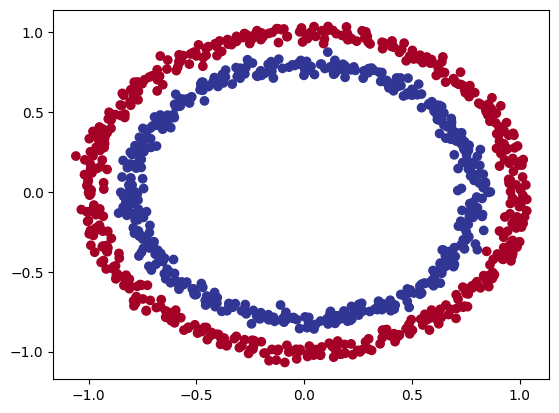

In [915]:
# VisualiZe
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)
# plt.plot(X[:,0],X[:,1])

### Checking input and output shapes

In [916]:
X.shape,y.shape

((1000, 2), (1000,))

In [917]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [918]:
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [919]:
X_sample=X[0]
y_sample=y[0]
print(f"value of first sample of x is {X_sample} and same for y is {y_sample}")
print(f"shape of first sample of x is {X_sample.shape} and same for y is {y_sample.shape}")

value of first sample of x is [0.75424625 0.23148074] and same for y is 1
shape of first sample of x is (2,) and same for y is ()


### Turn data into tensors and split into trainset and testset

In [920]:
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [921]:
X,y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0.]))

In [922]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=26)

In [923]:
len(Xtrain),len(Xtest),len(ytrain),len(ytest)

(800, 200, 800, 200)

In [924]:
Xtrain[:5],Xtest[:5],ytrain[:5],ytest[:5]

(tensor([[ 0.1639, -0.7976],
         [ 0.2174,  0.7647],
         [ 0.7922,  0.6216],
         [ 0.7377, -0.7215],
         [-0.4440,  0.6597]]),
 tensor([[-0.9481,  0.2601],
         [ 0.8833, -0.5178],
         [ 0.7015, -0.4042],
         [ 0.9160,  0.3900],
         [-0.6025,  0.4658]]),
 tensor([1., 1., 0., 0., 1.]),
 tensor([0., 0., 1., 0., 1.]))

### Build a binary classification model

lets build a model to classify our blue and red dots


1.   set up device agnostic code
2.   create a model by subclassing `nn.Module`
3.   define a loss function and optimiser
4.   create a trainiNG and testing loop


In [925]:
# import pytorch and nn
import torch
from torch import nn

#set up device agnostic code
device='cuda' if torch.cuda.is_available()  else 'cpu'
print(f"device being used : {device}")

device being used : cpu


In [926]:
class nnmodel(nn.Module):
  def __init__(self):
    super().__init__()
    # create two nn.Linear layers capable of handling shapes of our layer
    self.layer_1=nn.Linear(in_features=2,out_features=5) # takes two input since X has 2 features, and scales it to 5 (hidden layer)
    self.layer_2=nn.Linear(in_features=5,out_features=1) #takes 5 input features from layer_1 and gives one output since y is 1

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

In [927]:
model_0=nnmodel().to(device)

In [928]:
# # lets replicate the model using nn.Sequential()
# model_0=nn.Sequential(
#     nn.Linear(in_features=2,out_features=5)
#     nn.Linear(in_features=5,out_features=1)
# ).to(device)

# #OR

# class nnmodel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     # create two nn.Linear layers capable of handling shapes of our layer
#     self.two_layers=nn.Sequential(
#     nn.Linear(in_features=2,out_features=5)
#     nn.Linear(in_features=5,out_features=1))

#   def forward(self,x):
#     return self.two_layers(x)

### Set up loss function and optimiser function

- For a regression problem (predicting a number) you might used mean absolute error (MAE) loss.
- For a binary classification problem (like ours), you'll often use binary cross entropy as the loss function.
- However, the same optimizer function can often be used across different problem spaces.For example, the stochastic gradient descent optimizer (SGD, torch.optim.SGD()) can be used for a range of problems, and the same applies to the Adam optimizer (torch.optim.Adam()).

In [929]:
# set up loss function
lossfn=nn.BCEWithLogitsLoss() ## this has built in sigmoid function similar to `nn.Sequential(nn.Sigmoid(),nn.BCELoss())`

#set up an optimiser
optimiser=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [930]:
# accuracy function
def accuracy(ytrue,ypreds):
  correct=torch.eq(ytrue,ypreds).sum().item() # checks how many are equal and sums it up then converts into a list
  acc = (correct/len(ytrue))*100
  return acc

### Train Model
going from raw logits -> predictions probabilities -> predictions labels
- our model outputs are going to be raw **logits**
- we can convert logits into predictions probability by passing it into an activation function which introduces non linearity and converts into probabilities
- then we can convert them into prediction labels by using argmax() or by rounding them

 ### If y_pred_probs >= 0.5, y=1 (class 1)
### If y_pred_probs < 0.5, y=0 (class 0)

In [931]:
# view the output
model_0.eval()
with torch.inference_mode():
  ylogits=model_0(Xtest.to(device))[:5]
ylogits

tensor([[-0.7015],
        [-0.7720],
        [-0.7567],
        [-0.5622],
        [-0.6341]])

In [932]:
# convert into probabilities using sigmoid function
yprobs=torch.sigmoid(ylogits)
yprobs

tensor([[0.3315],
        [0.3160],
        [0.3194],
        [0.3630],
        [0.3466]])

In [933]:
# find the predicted labels
ypreds=torch.round(yprobs)
ypreds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [934]:
## Combining all
ypreds=torch.round(torch.sigmoid(model_0(Xtest.to(device))))
ypreds[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<SliceBackward0>)

### Building training and testing loop

In [935]:
torch.manual_seed(26)
Xtrain,Xtest=Xtrain.to(device),Xtest.to(device)
ytrain,ytest=ytrain.to(device),ytest.to(device)

epochs=100
for epoch in range(epochs):
  model_0.train()
  ylogits=model_0(Xtrain).squeeze()
  ypreds=torch.round(torch.sigmoid(ylogits))
  loss=lossfn(ylogits,ytrain)
  acc=accuracy(ytrue=ytrain,ypreds=ypreds)
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  model_0.eval()
  with torch.inference_mode():
    testlogits=model_0(Xtest).squeeze()
    testpred=torch.round(torch.sigmoid(testlogits))
    testloss=lossfn(testlogits,ytest)
    testacc=accuracy(ytrue=ytest,ypreds=testpred)

  if epoch % 10 == 0:
    print(f"epoch:{epoch}|trainloss:{loss}|trainacc:{acc:.2f}%|testloss:{testloss}|testacc:{testacc:.2f}%")

epoch:0|trainloss:0.7533518075942993|trainacc:50.38%|testloss:0.7627915740013123|testacc:48.50%
epoch:10|trainloss:0.7138822078704834|trainacc:50.38%|testloss:0.7214428782463074|testacc:48.50%
epoch:20|trainloss:0.7008219957351685|trainacc:50.38%|testloss:0.7061675786972046|testacc:48.50%
epoch:30|trainloss:0.6962580680847168|trainacc:50.38%|testloss:0.6999678015708923|testacc:48.50%
epoch:40|trainloss:0.6945745944976807|trainacc:41.00%|testloss:0.6972121596336365|testacc:40.50%
epoch:50|trainloss:0.6939038634300232|trainacc:46.88%|testloss:0.6958705186843872|testacc:46.50%
epoch:60|trainloss:0.693604052066803|trainacc:48.38%|testloss:0.6951584815979004|testacc:46.50%
epoch:70|trainloss:0.6934489607810974|trainacc:48.75%|testloss:0.6947506666183472|testacc:48.50%
epoch:80|trainloss:0.693355917930603|trainacc:48.12%|testloss:0.6945013403892517|testacc:48.50%
epoch:90|trainloss:0.6932937502861023|trainacc:48.88%|testloss:0.6943403482437134|testacc:48.50%


### Evaluate the model


In [936]:
import requests
from pathlib import Path

# download helper functions
if Path('helper_functions.py').is_file():
  print('helper_functions existss, skipping downloads')
else:
  print('downloading helper_functions')
  req=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(req.content)

from helper_functions import plot_predictions,plot_decision_boundary

helper_functions existss, skipping downloads


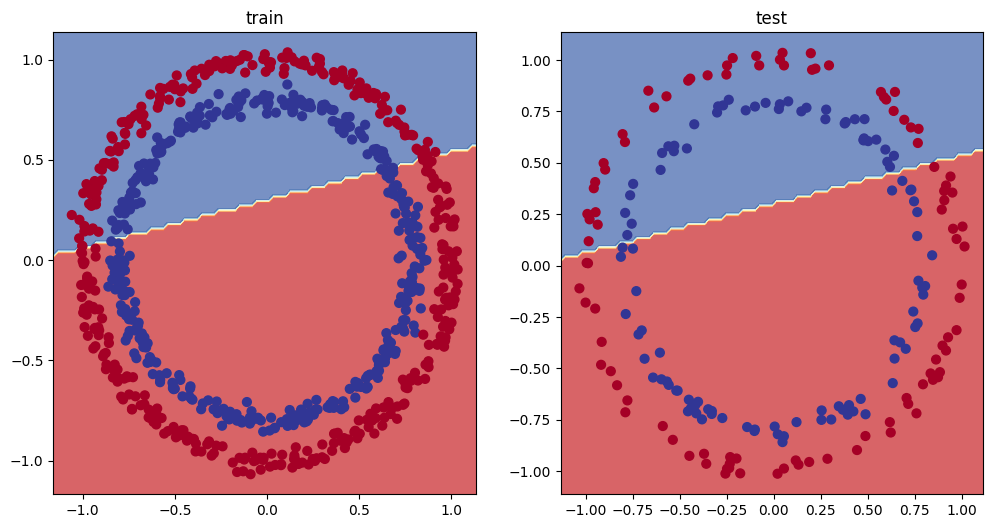

In [937]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_0,Xtrain,ytrain)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_0,Xtest,ytest)

## Improving our code

- Add more layers 2 -> 3
- Add more hidden units 5 -> 10
- Fitting for longer (more epochs) 100 -> 1000
- Changing the activation functions sigmoid -> ReLu
- Change the learning rate 0.1 -> 0.001
- Change the loss function
- Use transfer learning

In [938]:
class nnmodel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [939]:
model_1=nnmodel2().to(device)

In [940]:
# set up loss function
lossfn=nn.BCEWithLogitsLoss()

# set up an optimiser
optimiser=torch.optim.SGD(params=model_1.parameters(),lr=0.001)

In [941]:
torch.manual_seed(26)

epochs=1000
Xtrain,Xtest=Xtrain.to(device),Xtest.to(device)
ytrain,ytest=ytrain.to(device),ytest.to(device)

for epoch in range(epochs):
  model_1.train()
  ylogits=model_1(Xtrain).squeeze()
  ypreds=torch.round(torch.sigmoid(ylogits))

  loss=lossfn(ylogits,ytrain)
  trainacc=accuracy(ytrue=ytrain,ypreds=ypreds)

  optimiser.zero_grad()

  loss.backward()

  optimiser.step()

  model_1.eval()
  with torch.inference_mode():
    testlogits=model_1(Xtest).squeeze()
    testpreds=torch.round(torch.sigmoid(testlogits))
    testloss=lossfn(testlogits,ytest)
    testacc=accuracy(ytrue=ytest,ypreds=testpreds)

  if epoch % 100 == 0:
    print(f"epoch:{epoch}|trainloss:{loss}|trainacc:{trainacc:.2f}%|testloss:{testloss}|testacc:{testacc:.2f}%")

epoch:0|trainloss:0.6952386498451233|trainacc:45.88%|testloss:0.6961644887924194|testacc:42.00%
epoch:100|trainloss:0.6951318979263306|trainacc:46.00%|testloss:0.6959857940673828|testacc:41.00%
epoch:200|trainloss:0.6950335502624512|trainacc:46.12%|testloss:0.6958194971084595|testacc:41.50%
epoch:300|trainloss:0.6949429512023926|trainacc:46.75%|testloss:0.6956644654273987|testacc:42.00%
epoch:400|trainloss:0.6948592662811279|trainacc:47.25%|testloss:0.6955200433731079|testacc:42.50%
epoch:500|trainloss:0.6947817802429199|trainacc:47.38%|testloss:0.6953851580619812|testacc:42.50%
epoch:600|trainloss:0.6947100758552551|trainacc:47.62%|testloss:0.695259153842926|testacc:42.50%
epoch:700|trainloss:0.6946437358856201|trainacc:47.38%|testloss:0.6951413750648499|testacc:42.50%
epoch:800|trainloss:0.6945820450782776|trainacc:47.62%|testloss:0.6950312256813049|testacc:43.00%
epoch:900|trainloss:0.6945247054100037|trainacc:47.75%|testloss:0.6949280500411987|testacc:43.00%


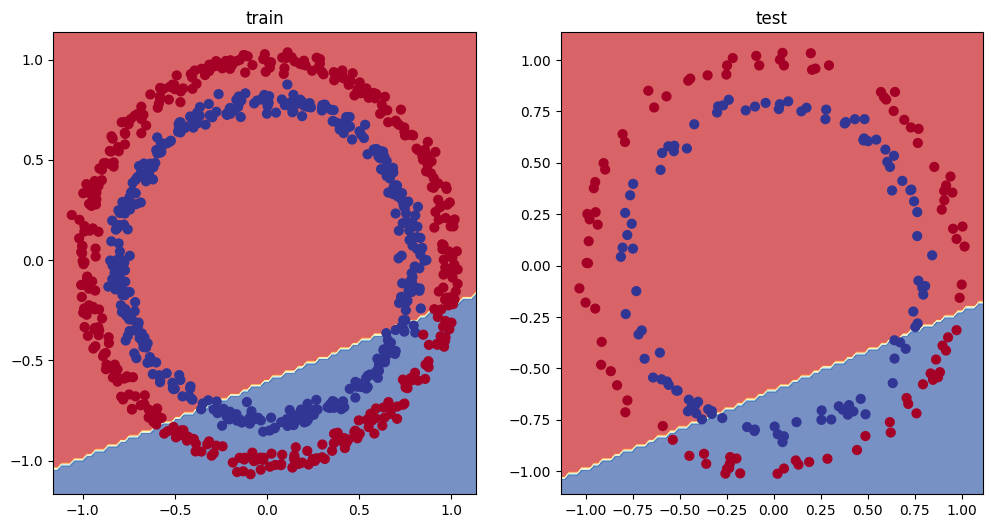

In [942]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_1,Xtrain,ytrain)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_1,Xtest,ytest)

### preparing data to see if our data can fit in a straight line

In [943]:
weight=0.7
bias=0.3

start=0
stop=1
step=0.01

xreg=torch.arange(start,stop,step).unsqueeze(dim=1)
yreg=(xreg*weight+bias)
xreg[:5],yreg[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [944]:
splitlength=int(0.8*len(xreg))
xtraining=xreg[:splitlength]
ytraining=yreg[:splitlength]
xtesting=xreg[splitlength:]
ytesting=yreg[splitlength:]
len(xtraining),len(xtesting)

(80, 20)

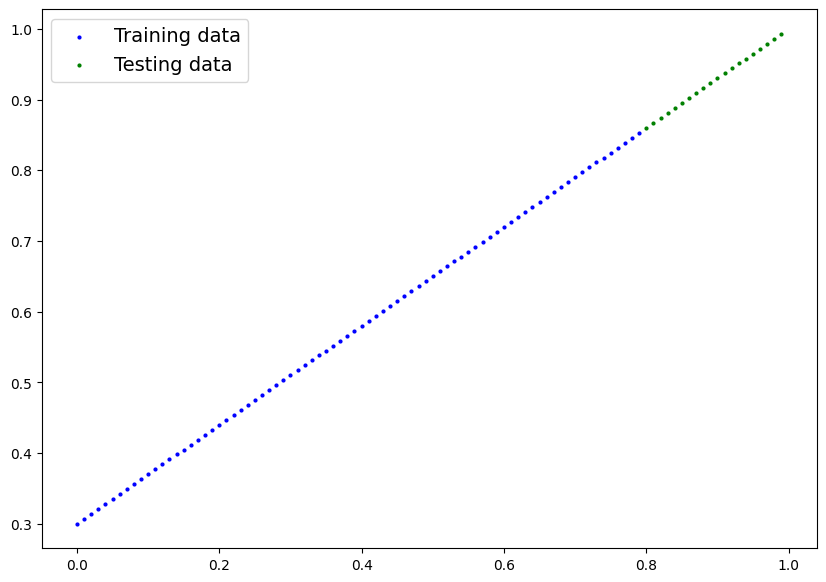

In [945]:
plot_predictions(train_data=xtraining,train_labels=ytraining,test_data=xtesting,test_labels=ytesting)

### Adjusting nnmodel2 to fit a straight line

In [946]:
class nnmodel3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=1,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [947]:
model_3=nnmodel3().to(device)

In [948]:
loss_fn=nn.L1Loss()
optimiserfn=torch.optim.SGD(model_3.parameters(),lr=0.02)

In [949]:
torch.manual_seed(55)
epochs=1000
xtraining=xtraining.to(device)
xtesting=xtesting.to(device)
ytraining=ytraining.to(device)
ytesting=ytesting.to(device)

for epoch in range(epochs):
  model_3.train()
  yregpreds=model_3(xtraining)
  regloss=loss_fn(yregpreds,ytraining)
  optimiserfn.zero_grad()
  regloss.backward()
  optimiserfn.step()

  model_3.eval()
  with torch.inference_mode():
    ytestpreds=model_3(xtesting)
    regtestloss=loss_fn(ytestpreds,ytesting)

  if epoch % 100 == 0:
    print(f"epoch:{epoch}|trainloss:{regloss}|testloss:{regtestloss}")

epoch:0|trainloss:1.672486662864685|testloss:1.8955554962158203
epoch:100|trainloss:0.0428302064538002|testloss:0.10182026773691177
epoch:200|trainloss:0.06674765050411224|testloss:0.01697533205151558
epoch:300|trainloss:0.05388449877500534|testloss:0.014194744639098644
epoch:400|trainloss:0.051630087196826935|testloss:0.012447267770767212
epoch:500|trainloss:0.044096410274505615|testloss:0.010883158072829247
epoch:600|trainloss:0.04014886915683746|testloss:0.01134493388235569
epoch:700|trainloss:0.043500788509845734|testloss:0.010993177071213722
epoch:800|trainloss:0.03673126548528671|testloss:0.00950923003256321
epoch:900|trainloss:0.031557776033878326|testloss:0.005775737576186657


From the decreasing loss it is evident that our model works well with linear data

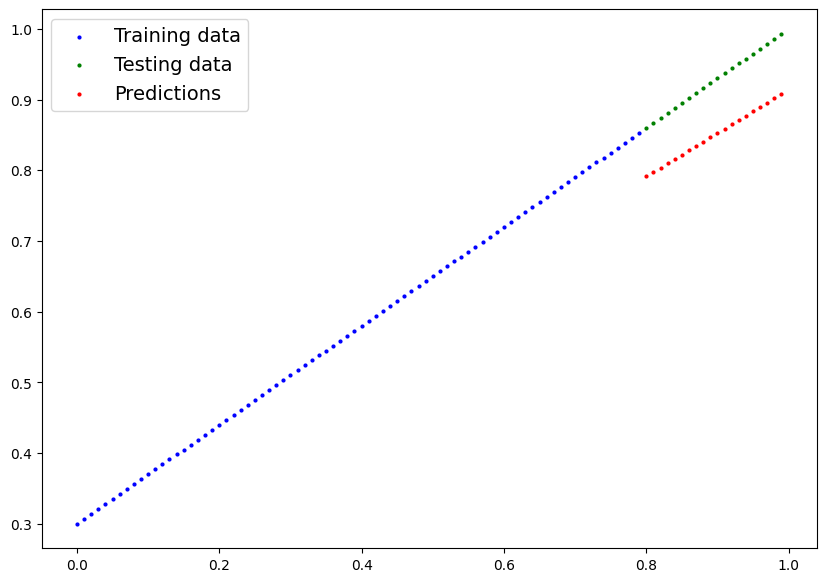

In [950]:
model_3.eval()
with torch.inference_mode():
  ypreds=model_3(xtesting)

plot_predictions(train_data=xtraining.cpu(),train_labels=ytraining.cpu(),test_data=xtesting.cpu(),test_labels=ytesting.cpu(),predictions=ypreds.cpu()) #use .cpu() if device='cuda'

## The missing piece: Non-linearity

### Creating non linear data

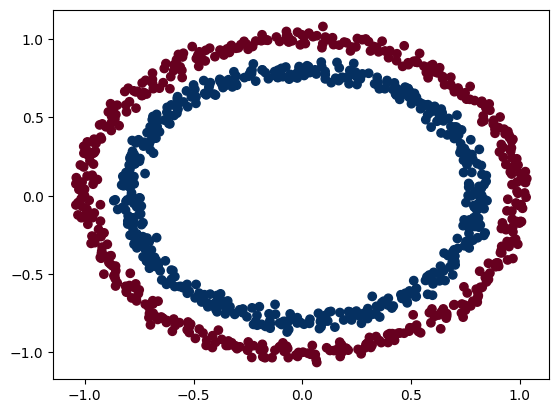

In [951]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,noise=0.03,random_state=555)
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdBu)


In [952]:
#convert data into tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

# split data
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=55)

### Building a model with non linearity

In [953]:
#build a model with non linear activation function

from torch import nn
class nonlinear(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_5=nonlinear().to(device)
model_5

nonlinear(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

### Plot predictions

In [954]:
model_5.eval()
with torch.inference_mode():
  ypred=torch.round(torch.sigmoid(model_5(Xtest)))

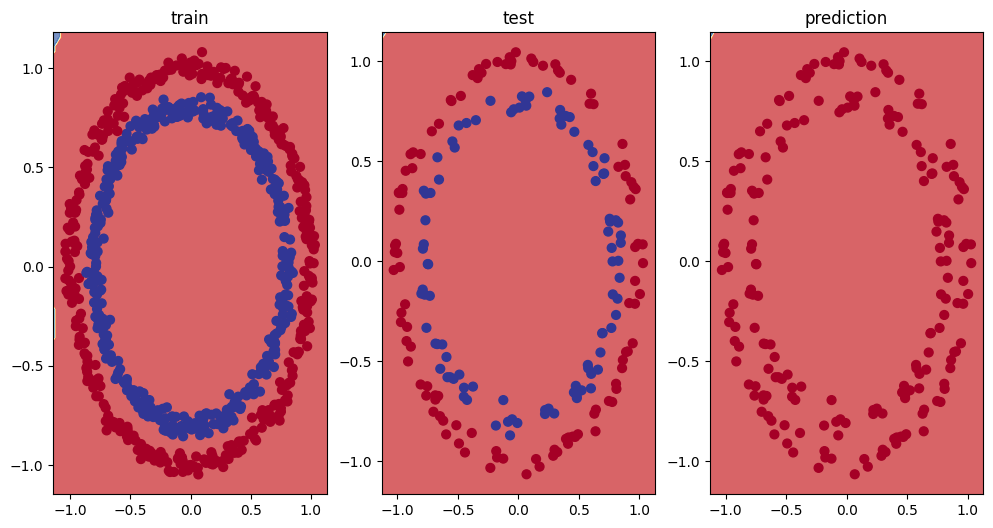

In [955]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('train')
plot_decision_boundary(model_5,Xtrain,ytrain)
plt.subplot(1,3,2)
plt.title('test')
plot_decision_boundary(model_5,Xtest,ytest)
plt.subplot(1,3,3)
plt.title('prediction')
plot_decision_boundary(model_5,Xtest,ypred)

### Train and test the model

In [956]:
# set up loss function
lossfn=nn.BCEWithLogitsLoss()

# set up an optimiser
optimiser=torch.optim.SGD(params=model_5.parameters(),lr=0.1)

In [957]:
# train the model

torch.manual_seed(26)
epochs=1000
Xtrain,Xtest=Xtrain.to(device),Xtest.to(device)
ytrain,ytest=ytrain.to(device),ytest.to(device)

for epoch in range(epochs):
  model_5.train()
  ylogits=model_5(Xtrain).squeeze()
  ypreds=torch.round(torch.sigmoid(ylogits))

  loss=lossfn(ylogits,ytrain)
  trainacc=accuracy(ytrue=ytrain,ypreds=ypreds)

  optimiser.zero_grad()

  loss.backward()

  optimiser.step()

  model_5.eval()
  with torch.inference_mode():
    testlogits=model_5(Xtest).squeeze()
    testpreds=torch.round(torch.sigmoid(testlogits))
    testloss=lossfn(testlogits,ytest)
    testacc=accuracy(ytrue=ytest,ypreds=testpreds)

  if epoch % 100 == 0:
    print(f"epoch:{epoch}|trainloss:{loss}|trainacc:{trainacc:.2f}%|testloss:{testloss}|testacc:{testacc:.2f}%")

epoch:0|trainloss:0.6936964392662048|trainacc:49.12%|testloss:0.6923118829727173|testacc:53.50%
epoch:100|trainloss:0.6891913414001465|trainacc:62.00%|testloss:0.6930439472198486|testacc:55.00%
epoch:200|trainloss:0.6850572824478149|trainacc:58.38%|testloss:0.6901876926422119|testacc:51.50%
epoch:300|trainloss:0.6796534657478333|trainacc:58.13%|testloss:0.686066746711731|testacc:51.00%
epoch:400|trainloss:0.6711840629577637|trainacc:63.12%|testloss:0.6792343854904175|testacc:56.00%
epoch:500|trainloss:0.6563283801078796|trainacc:70.12%|testloss:0.6646815538406372|testacc:66.00%
epoch:600|trainloss:0.6283432245254517|trainacc:82.25%|testloss:0.6353486776351929|testacc:81.50%
epoch:700|trainloss:0.5790218710899353|trainacc:86.75%|testloss:0.5839148759841919|testacc:87.50%
epoch:800|trainloss:0.48967766761779785|trainacc:94.75%|testloss:0.49158310890197754|testacc:94.50%
epoch:900|trainloss:0.35746169090270996|trainacc:97.75%|testloss:0.35860675573349|testacc:97.00%


### Evaluate

In [958]:
model_5.eval()
with torch.inference_mode():
  ypred=torch.round(torch.sigmoid(model_5(Xtest))).squeeze()

ypred[:5],ytest[:5]

(tensor([0., 1., 0., 0., 0.]), tensor([0., 1., 0., 0., 0.]))

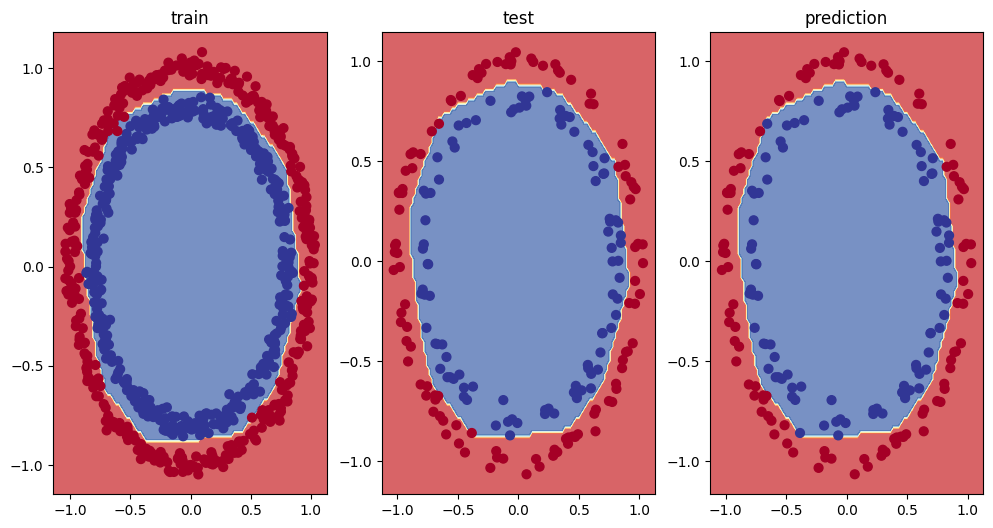

In [959]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('train')
plot_decision_boundary(model_5,Xtrain,ytrain)
plt.subplot(1,3,2)
plt.title('test')
plot_decision_boundary(model_5,Xtest,ytest)
plt.subplot(1,3,3)
plt.title('prediction')
plot_decision_boundary(model_5,Xtest,ypred)

### Replicating non linear activation functions

In [960]:
## create a tensor
a=torch.arange(-10,10,1, dtype=torch.float32)

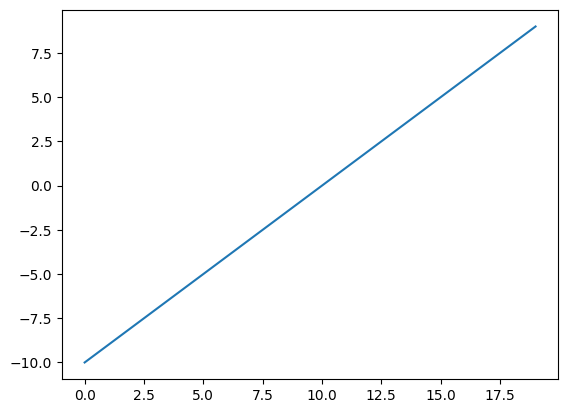

In [961]:
# visualise the data
plt.plot(a) #it is a straight line

In [962]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
         8., 9.]),
 [<matplotlib.lines.Line2D at 0x7e26b4792da0>])

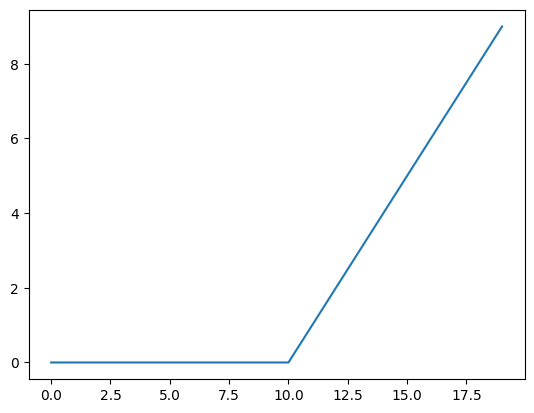

In [963]:
y=relu(a)
y,plt.plot(y)

In [964]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

(tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
         1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
         8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
         9.9966e-01, 9.9988e-01]),
 [<matplotlib.lines.Line2D at 0x7e26b49fec50>])

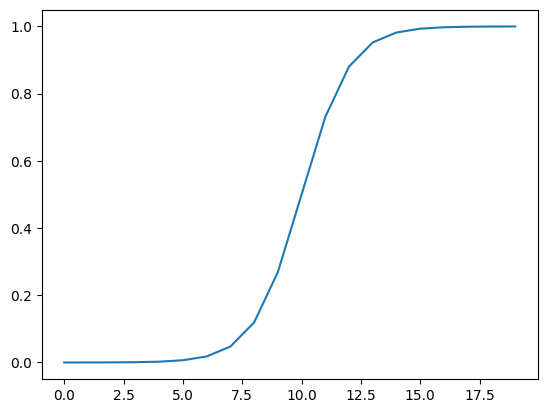

In [965]:
z=sigmoid(a)
z,plt.plot(z)

## Putting it all together : with a multi class classification problem

### Creating a toy multi class dataset

In [966]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [967]:
# set hyperparameters
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

Xblob,yblob=make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers=NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_SEED) # x has 1000samples divided into four classes , each sample has 2 features
Xblob[:5],yblob[:25]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475]]),
 array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3,
        3, 3, 1]))

In [968]:
#Turn into tensors
Xblob=torch.from_numpy(Xblob).type(torch.float)
yblob=torch.from_numpy(yblob).type(torch.LongTensor)

In [969]:
# split data
Xbtrain,Xbtest,ybtrain,ybtest=train_test_split(Xblob,yblob,test_size=0.2,random_state=42)

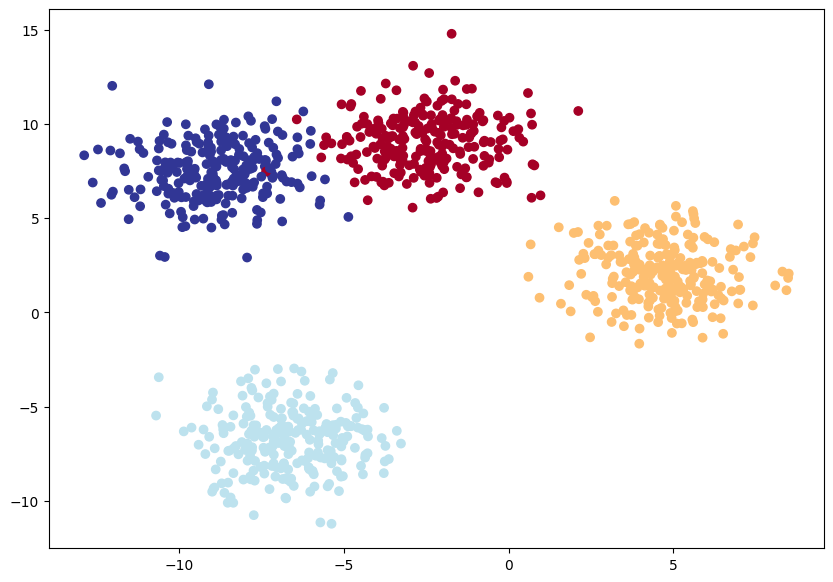

In [970]:
# visualise data
plt.figure(figsize=(10,7))
plt.scatter(x=Xblob[:,0],y=Xblob[:,1],c=yblob,cmap=plt.cm.RdYlBu)

### Build multiclass classification model

In [971]:
## set up device agnostic code
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [972]:
class multiclass(nn.Module):
  def __init__(self,input,output,hidden_units=8):
    super().__init__()
    self.layerstack=nn.Sequential(nn.Linear(in_features=input,out_features=hidden_units),
                                  nn.ReLU(),
                                  nn.Linear(in_features=hidden_units,out_features=hidden_units),
                                  nn.ReLU(),
                                  nn.Linear(in_features=hidden_units,out_features=output))

  def forward(self,x):
    return self.layerstack(x)

torch.manual_seed(55)
model_7=multiclass(input=2,output=4,hidden_units=8).to(device)
model_7

multiclass(
  (layerstack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Create a loss function and optimiser

In [973]:
lossfn=nn.CrossEntropyLoss()
optimiser=torch.optim.SGD(params=model_7.parameters(),lr=0.1)

### Getting predictions
in order to train and test our model we need to convert our model's raw outputs(logits) into prediction probabilities and then to prediction labels.

In [974]:
model_7.eval()
with torch.inference_mode():
  ylogits=model_7(Xbtest.to(device))
ylogits.shape, ylogits[:5] #this gives raw output

(torch.Size([200, 4]),
 tensor([[ 1.5921e-02, -3.3603e-01, -2.7026e-02, -1.0954e+00],
         [-5.9282e-02,  3.5022e-01,  9.7410e-01, -7.1290e-01],
         [-7.1494e-01, -1.3538e-01,  1.1193e-01, -4.3826e-01],
         [-2.9855e-01, -1.7793e-01,  4.5450e-02, -5.4154e-01],
         [-1.6446e-03, -2.5911e-01,  5.2099e-01, -1.8782e+00]]))

In [975]:
yprobs=torch.softmax(ylogits,dim=1) # gives probability for example a value 0.2552 at position 0 of sample0 tells that probability of sample0 being labeled  0 is 0.2552
yprobs[:5]

tensor([[0.3344, 0.2352, 0.3203, 0.1101],
        [0.1713, 0.2580, 0.4815, 0.0891],
        [0.1565, 0.2794, 0.3578, 0.2064],
        [0.2313, 0.2610, 0.3263, 0.1814],
        [0.2768, 0.2140, 0.4668, 0.0424]])

In [976]:
yprobs[1],torch.sum(yprobs[1]) # sum gives the total prob ie one

(tensor([0.1713, 0.2580, 0.4815, 0.0891]), tensor(1.0000))

In [977]:
torch.argmax(yprobs[1]) #gives the position of max probability ie the prob label

tensor(2)

In [978]:
# so to convert prob into labels
ypreds=torch.argmax(yprobs,dim=1)
ypreds[:30],ybtest[:30]

(tensor([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0]))

### Train the model

In [979]:
ybtrain.shape

torch.Size([800])

In [980]:
epochs=1000
Xbtrain,Xbtest,ybtrain,ybtest=Xbtrain.to(device),Xbtest.to(device),ybtrain.to(device),ybtest.to(device)
torch.manual_seed(55)

for epoch in range(epochs):
  model_7.train()
  ylogits=model_7(Xbtrain)
  ypreds=torch.argmax(torch.softmax(ylogits,dim=1),dim=1)
  loss=lossfn(ylogits,ybtrain)
  acc=accuracy(ytrue=ybtrain,ypreds=ypreds)
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

  model_7.eval()
  with torch.inference_mode():
    ytestlogits=model_7(Xbtest)
    ytestpreds=torch.argmax(torch.softmax(ytestlogits,dim=1),dim=1)
    testloss=lossfn(ytestlogits,ybtest)
    testacc=accuracy(ytrue=ybtest,ypreds=ytestpreds)

  if epoch%100 ==0:
    print(f"epoch:{epoch}|trainingloss:{loss}|trainingacc:{acc}|testingloss:{testloss}|testingacc:{testacc}")


epoch:0|trainingloss:1.5773190259933472|trainingacc:24.625|testingloss:1.2411301136016846|testingacc:55.50000000000001
epoch:100|trainingloss:0.03478457033634186|trainingacc:99.0|testingloss:0.02653942070901394|testingacc:99.5
epoch:200|trainingloss:0.027840590104460716|trainingacc:99.25|testingloss:0.01884482242166996|testingacc:99.5
epoch:300|trainingloss:0.02587072364985943|trainingacc:99.25|testingloss:0.016359947621822357|testingacc:99.5
epoch:400|trainingloss:0.024870214983820915|trainingacc:99.25|testingloss:0.014944378286600113|testingacc:99.5
epoch:500|trainingloss:0.024090314283967018|trainingacc:99.25|testingloss:0.014021038077771664|testingacc:99.5
epoch:600|trainingloss:0.023608596995472908|trainingacc:99.375|testingloss:0.013350511901080608|testingacc:99.5
epoch:700|trainingloss:0.0232037715613842|trainingacc:99.375|testingloss:0.012844137847423553|testingacc:99.5
epoch:800|trainingloss:0.02284582145512104|trainingacc:99.375|testingloss:0.012379911728203297|testingacc:99.

### Making predictions and evaluating model

In [981]:
model_7.eval()
with torch.inference_mode():
  ylogits=model_7(Xbtest)
  yprobs=torch.softmax(ylogits,dim=1)
  ypreds=torch.argmax(yprobs,dim=1)
ypreds[:5]

tensor([1, 3, 2, 1, 0])

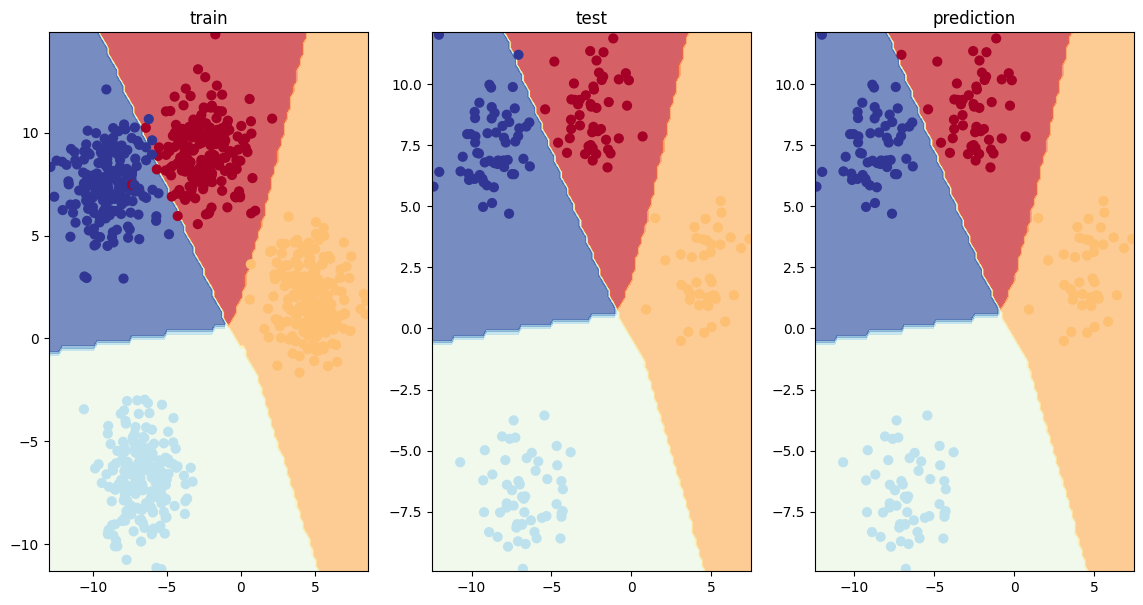

In [982]:
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.title('train')
plot_decision_boundary(model_7,Xbtrain,ybtrain)
plt.subplot(1,3,2)
plt.title('test')
plot_decision_boundary(model_7,Xbtest,ybtest)
plt.subplot(1,3,3)
plt.title('prediction')
plot_decision_boundary(model_7,Xbtest,ypreds)

##More classification evaluation metrics

- **Accuracy**	Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct.
- **Precision**	Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).
-**Recall**	Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.
- **F1-score**	Combines precision and recall into one metric. 1 is best, 0 is worst.
- **Confusion matrix**	Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
- **Classification report**	Collection of some of the main classification metrics such as precision, recall and f1-score.

In [983]:
!pip install torchmetrics

In [984]:
from torchmetrics import Accuracy

metrics = Accuracy(task="multiclass", num_classes=NUM_CLASSES).to(device)
metrics(ypreds,ybtest)

tensor(0.9950)